#**Week 15 - Group Activity on Unsupervised Learning**

_HELP International is an international humanitarian NGO that is committed to fighting
poverty and providing the people of backward countries with basic amenities and
relief during the time of disasters and natural calamities. After the recent project that
included a lot of awareness drives and funding programmes, they have been able to
raise around $ 10 million. The significant issues that come while making this decision
are mostly related to choosing the countries that are in the direst need of aid._

_How will you help this NGO to make a correct decision based on socio-economic
and health factors?_

######***Importing necessary libraries***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


######***Reading dataset Country-data.csv in to Python Environment using read_csv(). The first 5 observations are displayed.***

In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/ICTAK/Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


######***Displaying the last 5 observations***

In [ ]:
df.tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


######***Identifying the basic details of the dataset***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
df.describe(include='all')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
unique,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,NaN,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,NaN,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,NaN,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,NaN,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,NaN,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000


######***Finding the no: of Observations***

In [ ]:
df.shape

(167, 10)

######***Checking for null values***

In [ ]:
df.isna().sum().to_frame('Count of Null values')

,Count of Null values
country,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


######***Cleaning Data***

_The features - exports, health, imports are in percentage form we will convert them into normal values_

In [ ]:
df['exports'] = (df['exports']*df['gdpp'])/100

df['health'] = (df['health']*df['gdpp'])/100

df['imports'] = (df['imports']*df['gdpp'])/100

In [ ]:
df.describe(include='all')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
unique,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,NaN,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,NaN,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,NaN,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,NaN,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,NaN,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000


######***Checking for Outliers***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

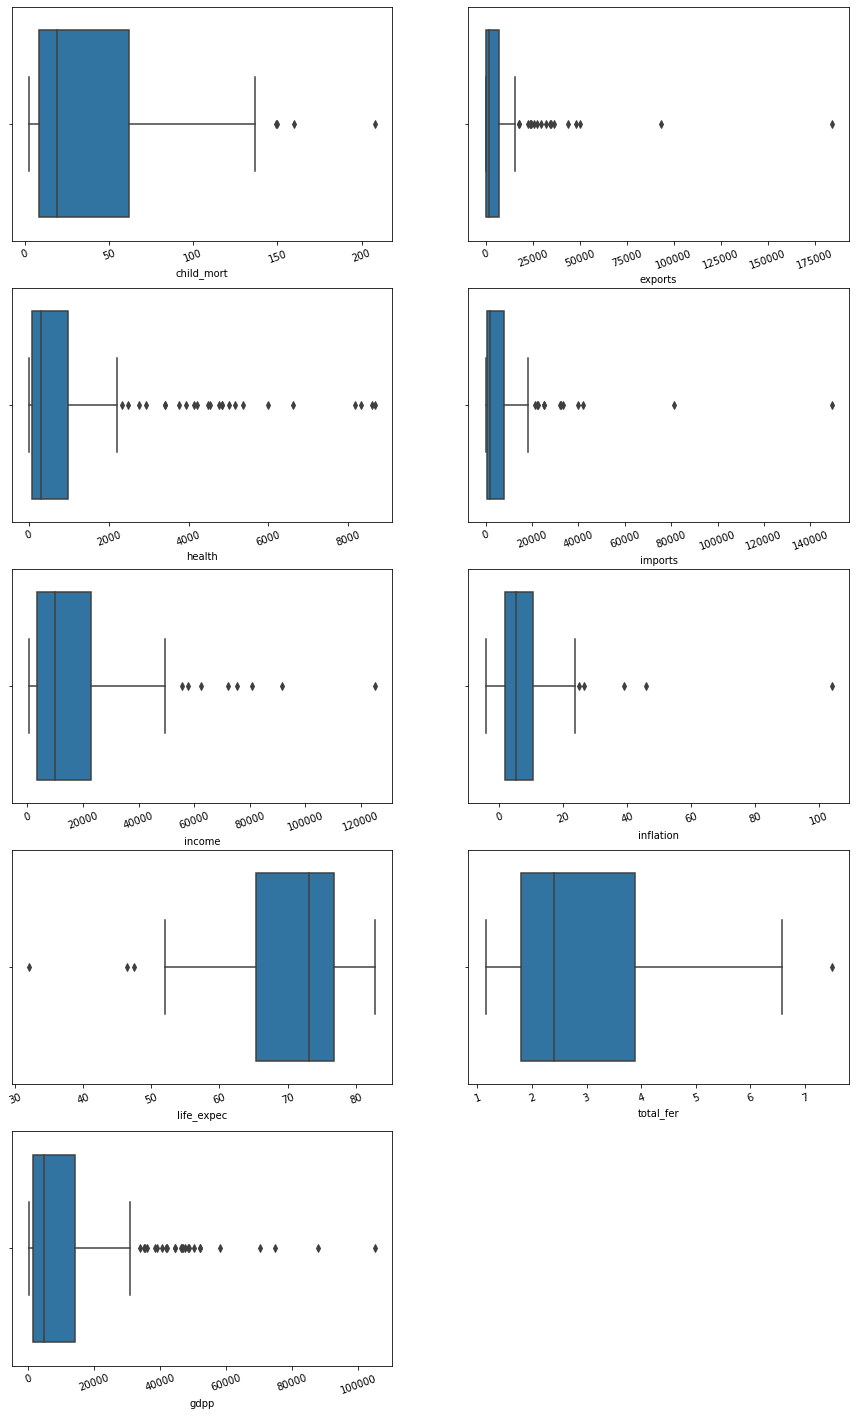

In [ ]:
plt.figure(figsize=(15,25))
features = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
for i in enumerate(features): 
    ax = plt.subplot(5, 2, i[0]+1)
    sns.boxplot(df[i[1]])
    plt.xticks(rotation = 20)   

######***Handling Outliers***

In [ ]:
for i in ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']:
  Q1=np.percentile(df[i],25,interpolation='midpoint')
  Q2=np.percentile(df[i],50,interpolation='midpoint')
  Q3=np.percentile(df[i],75,interpolation='midpoint')
  IQR=Q3-Q1
  low_limit=Q1-1.5*IQR
  up_limit=Q3+1.5*IQR
  df.loc[df[i]<low_limit, i] = low_limit
  df.loc[df[i]>up_limit, i] = up_limit

######***Checking whether all Outliers are removed or not***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

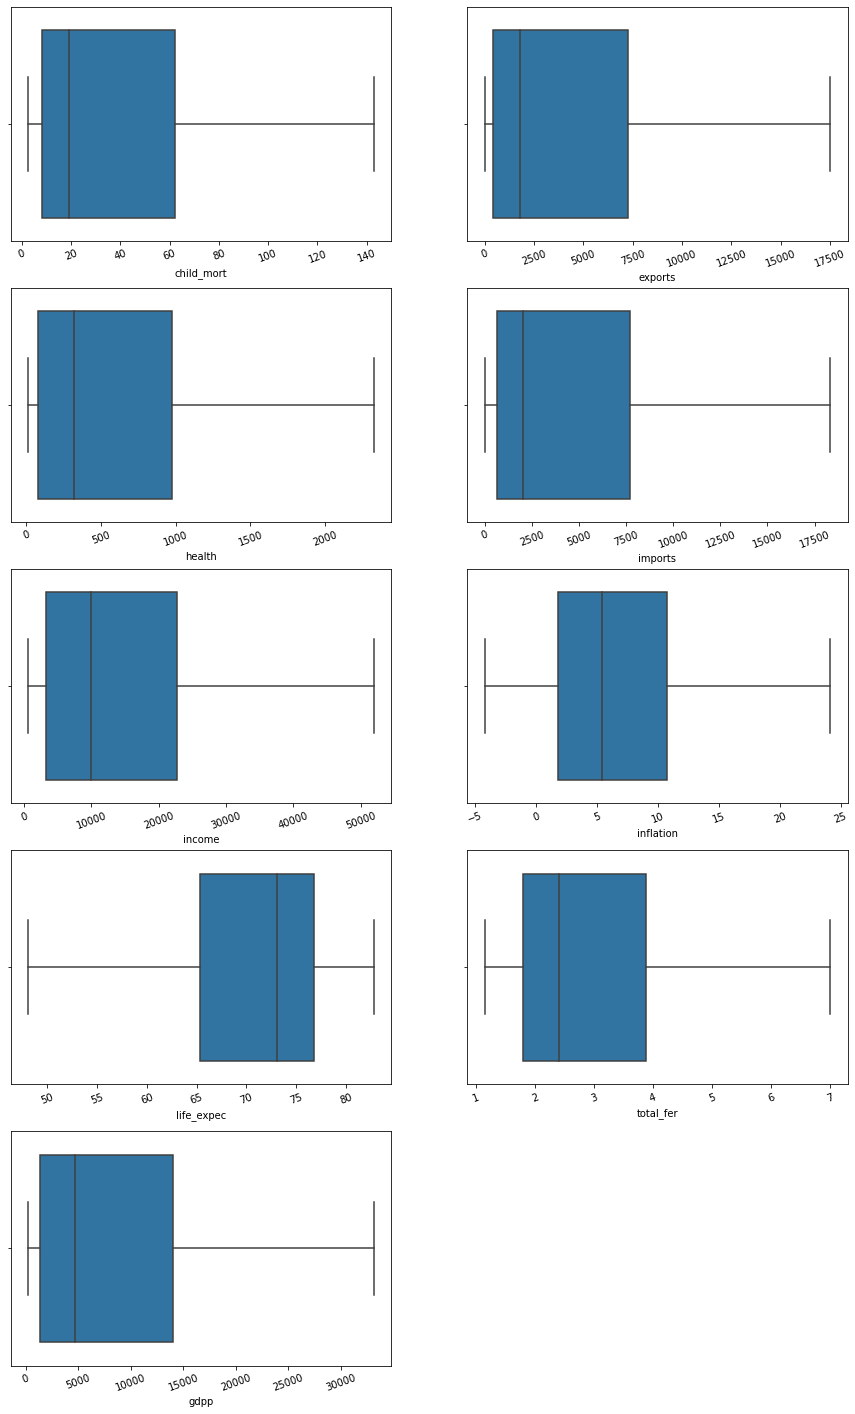

In [ ]:
plt.figure(figsize=(15,25))
features = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
for i in enumerate(features): 
    ax = plt.subplot(5, 2, i[0]+1)
    sns.boxplot(df[i[1]])
    plt.xticks(rotation = 20)   

In [ ]:
df.describe(include='all')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
unique,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,37.698204,4710.954895,680.241240,4756.898995,15921.574850,7.065066,70.663772,2.945075,10351.281437
std,NaN,38.443293,5832.960967,804.768458,5690.687520,15207.197459,6.704968,8.522535,1.505564,11612.044330
min,NaN,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,48.050000,1.150000,231.000000
25%,NaN,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,NaN,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,NaN,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000


######***Scaling Data***

In [ ]:
df1 =df.drop('country',axis=1)
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df1 = standard_scaler.fit_transform(df1)

##***K-means Clustering***

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,7):
  kmeans=KMeans(n_clusters=i, init='k-means++',  random_state=42)
  kmeans.fit(df1)
  wcss.append(kmeans.inertia_)

######***Optimum number of Clusters using Elbow Method***

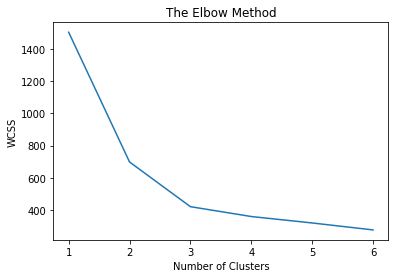

In [ ]:
plt.plot(range(1,7), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

##**Insights**:
_The number of clusters as per the Elbow Method is: 3_

######***Initializing K-means with 3 Clusters***

In [ ]:
kmeans=KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans=kmeans.fit_predict(df1)

In [ ]:
df2 = pd.concat([df, pd.Series(y_kmeans)], axis = 1)
df2.columns = ['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','clusters']
df2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200,2


######***Scatter Plotting***

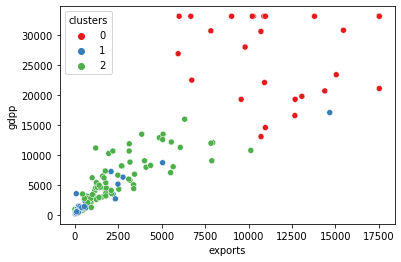

In [ ]:
sns.scatterplot(x = 'exports', y = 'gdpp', hue ='clusters', legend = 'full', data = df2, palette='Set1')
plt.show()

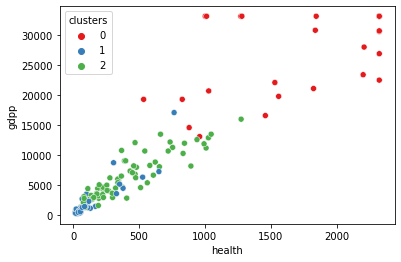

In [ ]:
sns.scatterplot(x = 'health', y = 'gdpp', hue ='clusters', legend = 'full', data = df2, palette='Set1')
plt.show()

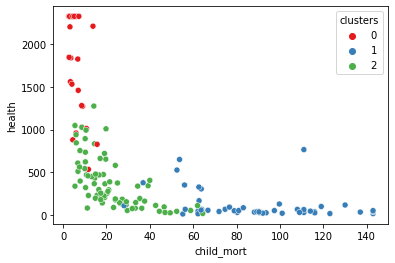

In [ ]:
sns.scatterplot(x = 'child_mort', y = 'health', hue ='clusters', legend = 'full', data = df2, palette='Set1')
plt.show()

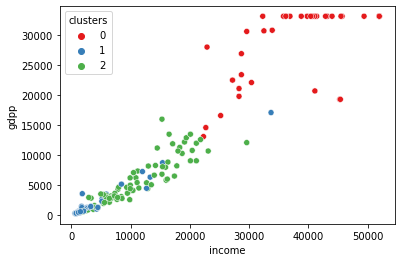

In [ ]:
sns.scatterplot(x = 'income', y = 'gdpp', hue ='clusters', legend = 'full', data = df2, palette='Set1')
plt.show()

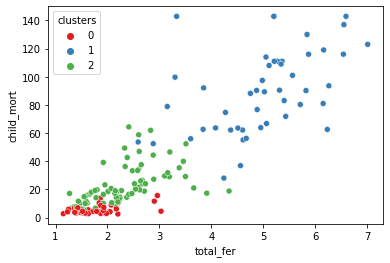

In [ ]:
sns.scatterplot(x = 'total_fer', y = 'child_mort', hue ='clusters', legend = 'full', data = df2, palette='Set1')
plt.show()

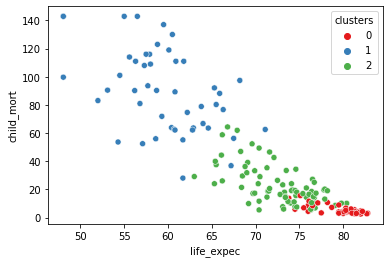

In [ ]:
sns.scatterplot(x = 'life_expec', y = 'child_mort', hue ='clusters', legend = 'full', data = df2, palette='Set1')
plt.show()

######***Cluster 1 has very low income and gdpp and very high child mortality rate this cluster will be our focus.***

In [ ]:
df2[df2['clusters']==1]['country'].to_frame()

,country
0,Afghanistan
3,Angola
17,Benin
21,Botswana
25,Burkina Faso
26,Burundi
28,Cameroon
31,Central African Republic
32,Chad
36,Comoros


##***Top 10 countries obtained from K-Means Models are:***

In [ ]:
top_kmeans = df2[df2['clusters']==1].sort_values(["child_mort"], ascending=False)
top_kmeans = top_kmeans.reset_index().drop('index',axis=1)
top_kmeans.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
0,Chad,142.875,330.096,40.6341,390.195,1930.0,6.39,56.50,6.5900,897,1
1,Central African Republic,142.875,52.628,17.7508,118.190,888.0,2.01,48.05,5.2100,446,1
2,Sierra Leone,142.875,67.032,52.2690,137.655,1220.0,17.20,55.00,5.2000,399,1
3,Haiti,142.875,101.286,45.7442,428.314,1500.0,5.45,48.05,3.3300,662,1
4,Mali,137.000,161.424,35.2584,248.508,1870.0,4.37,59.50,6.5500,708,1
5,Nigeria,130.000,589.490,118.1310,405.420,5150.0,24.16,60.50,5.8400,2330,1
6,Niger,123.000,77.256,17.9568,170.868,814.0,2.55,58.80,7.0075,348,1
7,Angola,119.000,2199.190,100.6050,1514.370,5900.0,22.40,60.10,6.1600,3530,1
8,Burkina Faso,116.000,110.400,38.7550,170.200,1430.0,6.81,57.90,5.8700,575,1
9,"Congo, Dem. Rep.",116.000,137.274,26.4194,165.664,609.0,20.80,57.50,6.5400,334,1


##***Agglomerative Hierarchical Clustering***

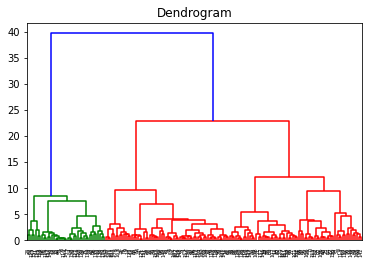

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(df1,method='ward'))
plt.title('Dendrogram')
plt.show()

##**Insights**:
_The number of clusters as per the Dendrogram Method is: 3_

######***Initializing Agglomerative Hierarchical Clustering with 3 Clusters***

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc=hc.fit_predict(df1)

In [ ]:
df2 = pd.concat([df, pd.Series(y_hc)], axis = 1)
df2.columns = ['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','clusters']
df2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200,2


######***Scatter Plotting***

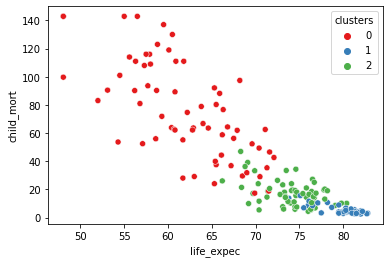

In [ ]:
sns.scatterplot(x = 'life_expec', y = 'child_mort', hue ='clusters', legend = 'full', data = df2, palette='Set1')
plt.show()

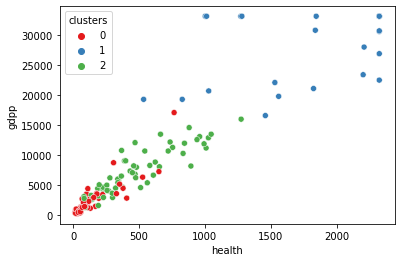

In [ ]:
sns.scatterplot(x = 'health', y = 'gdpp', hue ='clusters', legend = 'full', data = df2, palette='Set1')
plt.show()

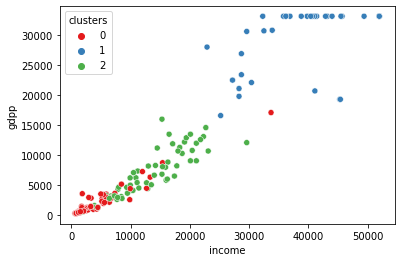

In [ ]:
sns.scatterplot(x = 'income', y = 'gdpp', hue ='clusters', legend = 'full', data = df2, palette='Set1')
plt.show()

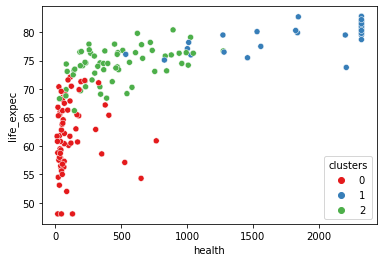

In [ ]:
sns.scatterplot(x = 'health', y = 'life_expec', hue ='clusters', legend = 'full', data = df2, palette='Set1')
plt.show()

######***Cluster 0 has very low income and gdpp and very high child mortality rate this cluster will be our focus.***

In [ ]:
df2[df2['clusters']==0]['country'].to_frame()

,country
0,Afghanistan
3,Angola
12,Bangladesh
17,Benin
18,Bhutan
...,...
154,Turkmenistan
155,Uganda
162,Vanuatu
165,Yemen


##***Top 10 Countries obtained from Hierarchical Models are:***

In [ ]:
top_h = df2[df2['clusters']==0].sort_values(["child_mort"], ascending=False) 
top_h = top_h.reset_index().drop('index',1)
top_h.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
0,Central African Republic,142.875,52.628,17.7508,118.190,888.0,2.01,48.05,5.2100,446,0
1,Haiti,142.875,101.286,45.7442,428.314,1500.0,5.45,48.05,3.3300,662,0
2,Sierra Leone,142.875,67.032,52.2690,137.655,1220.0,17.20,55.00,5.2000,399,0
3,Chad,142.875,330.096,40.6341,390.195,1930.0,6.39,56.50,6.5900,897,0
4,Mali,137.000,161.424,35.2584,248.508,1870.0,4.37,59.50,6.5500,708,0
5,Nigeria,130.000,589.490,118.1310,405.420,5150.0,24.16,60.50,5.8400,2330,0
6,Niger,123.000,77.256,17.9568,170.868,814.0,2.55,58.80,7.0075,348,0
7,Angola,119.000,2199.190,100.6050,1514.370,5900.0,22.40,60.10,6.1600,3530,0
8,"Congo, Dem. Rep.",116.000,137.274,26.4194,165.664,609.0,20.80,57.50,6.5400,334,0
9,Burkina Faso,116.000,110.400,38.7550,170.200,1430.0,6.81,57.90,5.8700,575,0
